In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Renewable Energy Site Data_Traducido.csv')  # Asegúrate de poner el nombre correcto del archivo
df.head()  # Verifica las primeras filas

,Número/número de la estación de energía de la estación de energía,Tipo de energía,Nombre/nombre de la estación de energía de la estación de alimentación,Número de sitio/número del sitio,Descripción del sitio,Modelo/modelo,Capacidad instalada (KW),Número de ventiladores/número de WindTurbine,Dirección/dirección,Estado de la aplicación,Observaciones
0,1,Viento de tierra/viento en tierra,Estación de energía eólica de espíritu de Shim...,1.0,石門(#1~#6),Vestas V47,2640,4.0,新北市石門區尖鹿里,取得執照,Altura de la rueda: 45 metros
1,2,Viento de tierra/viento en tierra,Estación de energía eólica de Linkou/estación ...,2.0,林口(#4~#6),Vestas V80,6000,3.0,新北市林口區下福里139-1號,取得執照,Altura de la rueda: 67 metros
2,3,Viento de tierra/viento en tierra,Estación de energía eólica de Luzhu/estación d...,3.0,Reed Bamboo (#1 ~#8),Enercon E44,7200,8.0,桃園市蘆竹區坑口里、濱海里,Obtener una licencia,Altura de la rueda: 45 metros
3,4,Viento de tierra/viento en tierra,Estación de energía eólica de Guanyuan/estació...,4.0,Ver jardín (#1 ~#20),GE 1.5se,30000,20.0,桃園市大園區北港里(#1~#5)、觀音區草漯里(#6~#11)、觀音區樹林里(#12~#20),Obtener una licencia,Altura de la rueda: 64.7 metros
4,5,Viento de tierra/viento en tierra,Estación de energía eólica de data,5.0,大潭1(#1~#3),GE 1.5se,4500,3.0,"DataNli y Baoshengli, distrito de Guanyin, ciu...",Obtener una licencia,Altura de la rueda: 64.7 metros


In [3]:
# Verificar las columnas y tipos de datos
df.info()

# Verificar valores nulos
df.isnull().sum()

# Eliminar o reemplazar valores nulos si es necesario
df = df.dropna()  # O puedes reemplazar los nulos con df.fillna(valor)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 11 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Número/número de la estación de energía de la estación de energía       94 non-null     object 
 1   Tipo de energía                                                         91 non-null     object 
 2   Nombre/nombre de la estación de energía de la estación de alimentación  95 non-null     object 
 3   Número de sitio/número del sitio                                        91 non-null     float64
 4   Descripción del sitio                                                   95 non-null     object 
 5   Modelo/modelo                                                           89 non-null     object 
 6   Capacidad instalada (KW)                                                95 non-null 

In [4]:
# Ejemplo de crear una columna con eficiencia de cada estación (relacionar capacidad instalada con el número de ventiladores)
df['Eficiencia'] = df['Capacidad instalada (KW)'] / df['Número de ventiladores/número de WindTurbine']

# Analizar la distribución de capacidad por tipo de energía
capacidad_por_tipo = df.groupby('Tipo de energía')['Capacidad instalada (KW)'].sum().sort_values(ascending=False)
print(capacidad_por_tipo)


Tipo de energía
Viento de tierra/viento en tierra    330240
Viento en alta mar                   109200
Name: Capacidad instalada (KW), dtype: int64


In [6]:
import folium

# Crear un mapa base de Taipéi
mapa = folium.Map(location=[25.0330, 121.5654], zoom_start=12)  # Coordenadas aproximadas de Taipéi

# Verificar si las columnas 'Latitud' y 'Longitud' existen en el DataFrame
if 'Latitud' in df.columns and 'Longitud' in df.columns:
    # Si existen, iterar y agregar marcadores al mapa
    for index, row in df.iterrows():
        folium.CircleMarker(
            location=[row['Latitud'], row['Longitud']],
            radius=5,
            color='blue',
            fill=True
        ).add_to(mapa)
else:
    # Si no existen, imprimir un mensaje de error
    print("Error: Las columnas 'Latitud' y 'Longitud' no se encontraron en el DataFrame.")

# Mostrar el mapa
mapa

Error: Las columnas 'Latitud' y 'Longitud' no se encontraron en el DataFrame.


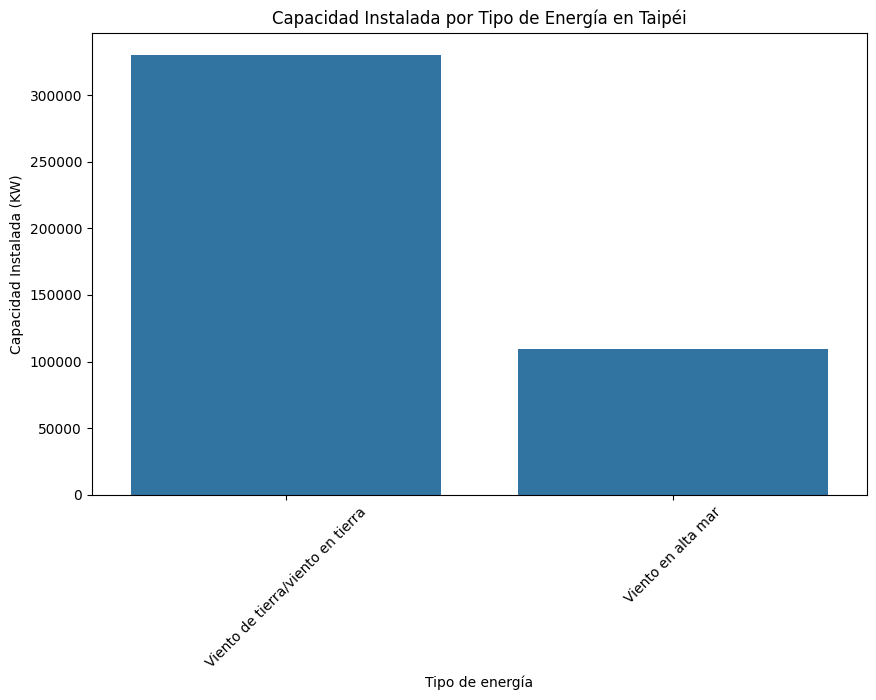

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de la capacidad instalada por tipo de energía
plt.figure(figsize=(10,6))
sns.barplot(x=capacidad_por_tipo.index, y=capacidad_por_tipo.values)
plt.title('Capacidad Instalada por Tipo de Energía en Taipéi')
plt.ylabel('Capacidad Instalada (KW)')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Mostrar las estaciones con mayor capacidad instalada
top_estaciones = df.sort_values(by='Capacidad instalada (KW)', ascending=False).head(10)

# Visualizar las 10 principales estaciones por capacidad instalada
print(top_estaciones[['Nombre/nombre de la estación de energía de la estación de alimentación', 'Capacidad instalada (KW)']])


   Nombre/nombre de la estación de energía de la estación de alimentación  \
27    Estación de energía eólica de fase en alta mar1                       
11  Estación de energía eólica Changgong/estación ...                       
3   Estación de energía eólica de Guanyuan/estació...                       
17  Estación de energía eólica de Yunlin Mailiao/Y...                       
20  Estación de energía eólica Yunlin Sihu/Estació...                       
8   Estación de energía eólica del puerto de Taich...                       
15  Estación de energía eólica Changhua Wanggong/C...                       
12  Estación de energía eólica Changgong/estación ...                       
18  Estación de energía eólica de Yunlin Mailiao/Y...                       
14  Estación de energía eólica Changgong/estación ...                       

    Capacidad instalada (KW)  
27                    109200  
11                     46000  
3                      30000  
17                     30000

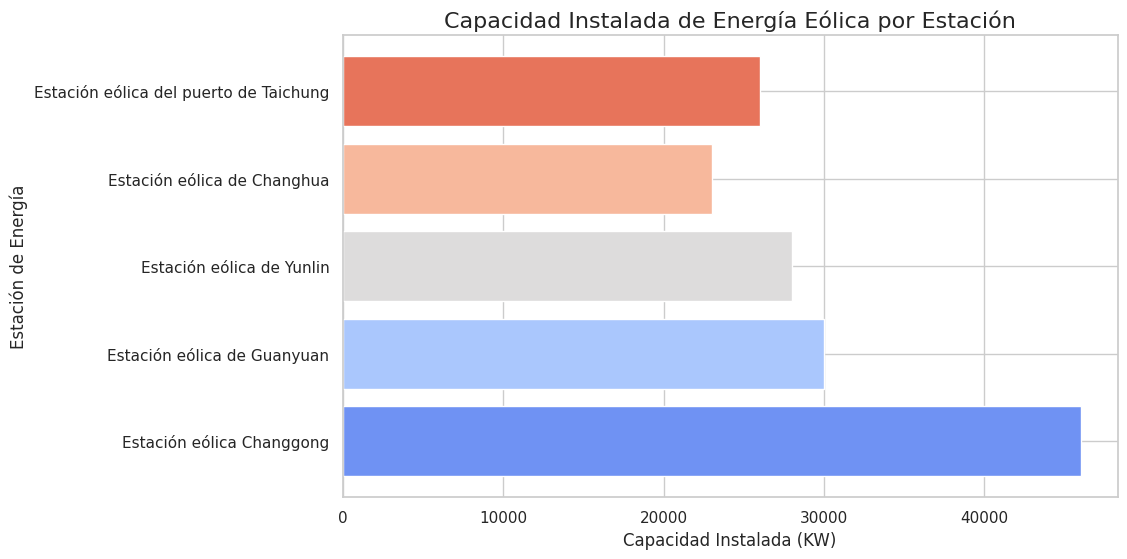

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos de ejemplo
data = {
    'Estación': ['Estación eólica Changgong', 'Estación eólica de Guanyuan', 'Estación eólica de Yunlin', 'Estación eólica de Changhua', 'Estación eólica del puerto de Taichung'],
    'Capacidad (KW)': [46000, 30000, 28000, 23000, 26000]
}

df = pd.DataFrame(data)

# Establecer el estilo de Seaborn para colores atractivos
sns.set(style="whitegrid")

# Gráfico de barras con colores diferentes
plt.figure(figsize=(10, 6))
plt.barh(df['Estación'], df['Capacidad (KW)'], color=sns.color_palette("coolwarm", len(df)))

# Añadir título y etiquetas
plt.title('Capacidad Instalada de Energía Eólica por Estación', fontsize=16)
plt.xlabel('Capacidad Instalada (KW)', fontsize=12)
plt.ylabel('Estación de Energía', fontsize=12)

# Mostrar el gráfico
plt.show()


In [12]:
# Asumiendo que ya tienes cargado tu DataFrame como `df`
df['fecha_actualizacion'] = '2024-06-21'  # Asignando la fecha de actualización


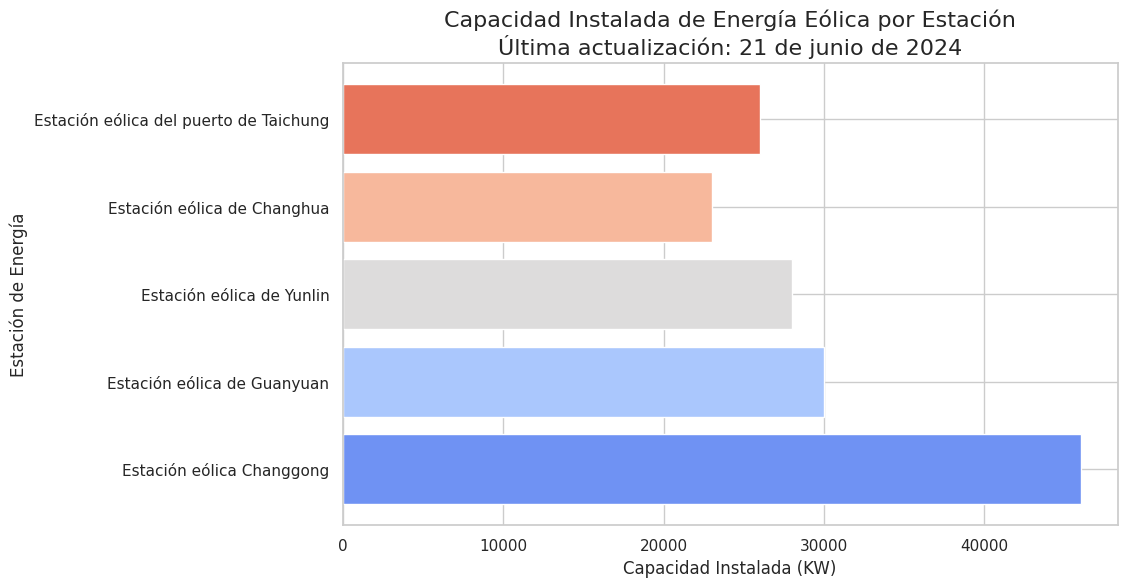

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos de ejemplo
data = {
    'Estación': ['Estación eólica Changgong', 'Estación eólica de Guanyuan', 'Estación eólica de Yunlin', 'Estación eólica de Changhua', 'Estación eólica del puerto de Taichung'],
    'Capacidad (KW)': [46000, 30000, 28000, 23000, 26000]
}

df = pd.DataFrame(data)

# Establecer el estilo de Seaborn para colores atractivos
sns.set(style="whitegrid")

# Gráfico de barras con colores diferentes
plt.figure(figsize=(10, 6))
plt.barh(df['Estación'], df['Capacidad (KW)'], color=sns.color_palette("coolwarm", len(df)))

# Añadir título, etiquetas y fecha de la última actualización
ultima_actualizacion = "Última actualización: 21 de junio de 2024"
plt.title(f'Capacidad Instalada de Energía Eólica por Estación\n{ultima_actualizacion}', fontsize=16)
plt.xlabel('Capacidad Instalada (KW)', fontsize=12)
plt.ylabel('Estación de Energía', fontsize=12)

# Mostrar el gráfico
plt.show()


In [20]:
import pandas as pd

# Datos de ejemplo (deberías sustituir estos datos por los reales)
data = {
    'Estación': ['Estación eólica Changgong', 'Estación eólica de Guanyuan', 'Estación eólica de Yunlin', 'Estación eólica de Changhua', 'Estación eólica del puerto de Taichung'],
    'Capacidad instalada (KW)': [46000, 30000, 28000, 23000, 26000]
}

df = pd.DataFrame(data)

# Mostrar las estaciones con mayor capacidad instalada
top_estaciones = df.sort_values(by='Capacidad instalada (KW)', ascending=False).head(10)

# Visualizar las 10 principales estaciones por capacidad instalada
print(top_estaciones[['Estación', 'Capacidad instalada (KW)']])


                                 Estación  Capacidad instalada (KW)
0               Estación eólica Changgong                     46000
1             Estación eólica de Guanyuan                     30000
2               Estación eólica de Yunlin                     28000
4  Estación eólica del puerto de Taichung                     26000
3             Estación eólica de Changhua                     23000


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

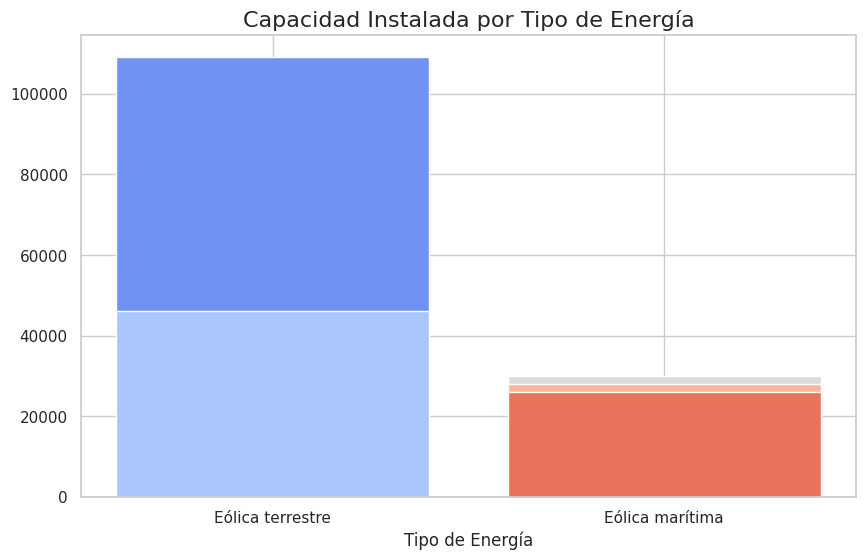

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Datos de ejemplo
data = {
    'Tipo de energía': ['Eólica terrestre', 'Eólica terrestre', 'Eólica marítima', 'Eólica marítima', 'Eólica marítima'],
    'Capacidad instalada (KW)': [109200, 46000, 30000, 28000, 26000]
}

df = pd.DataFrame(data)

# Establecer el estilo de Seaborn para colores atractivos
sns.set(style="whitegrid")

# Gráfico de barras con colores diferentes por tipo de energía
plt.figure(figsize=(10, 6))
plt.bar(df['Tipo de energía'], df['Capacidad instalada (KW)'], color=sns.color_palette("coolwarm", len(df)))

# Añadir título y etiquetas
plt.title('Capacidad Instalada por Tipo de Energía', fontsize=16)
plt.xlabel('Tipo de Energía', fontsize=12)
plt
